# 13wk-51: 아이스크림(type무의미) / 자료분석(Autogluon)

최규빈  
2023-11-21

# 1. 강의영상

[????](????)

# 2. Imports

In [3]:
#!pip install autogluon.eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

In [3]:
df_train.head()

# 4. 적합

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'sales')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_195446/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_195446/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.63 GB / 1887.51 GB (84.0%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (88.99437629756306, 10.335207096486446, 51.10189, 21.16757)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting

[1000]  valid_set's rmse: 3.11194

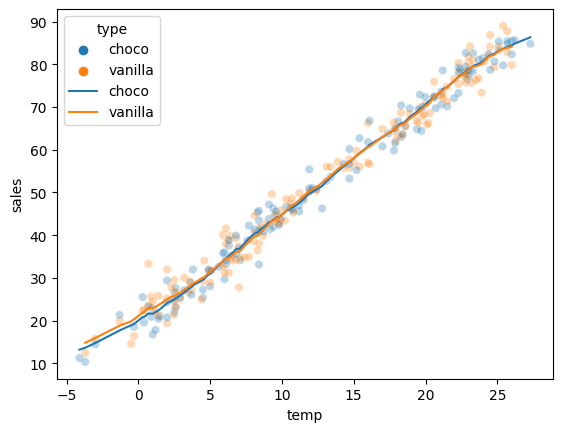

In [5]:
sns.scatterplot(df_train, x='temp', y='sales', hue='type',alpha=0.3)
sns.lineplot(df_train, x='temp',y=yhat, hue='type')

In [7]:
predictr.leaderboard(silent=True)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

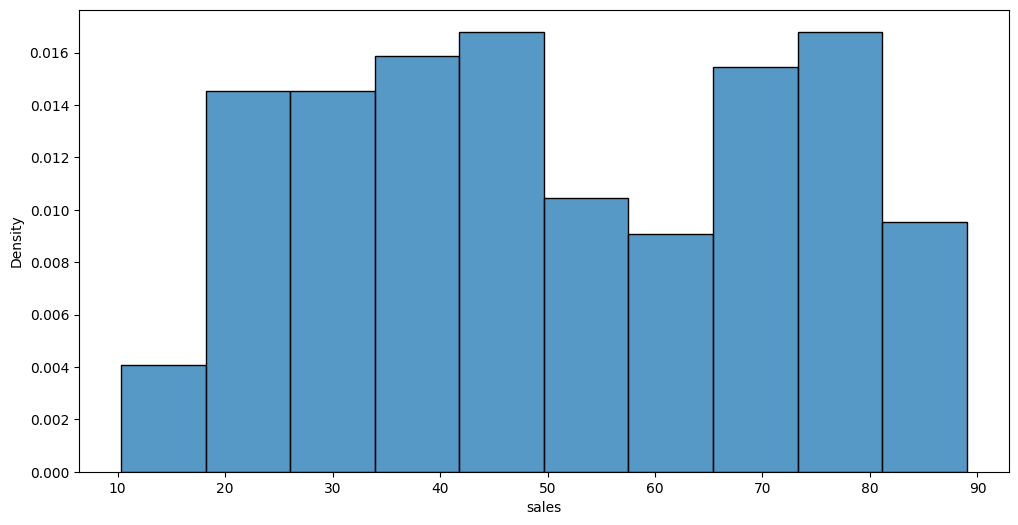

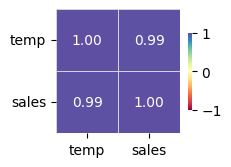

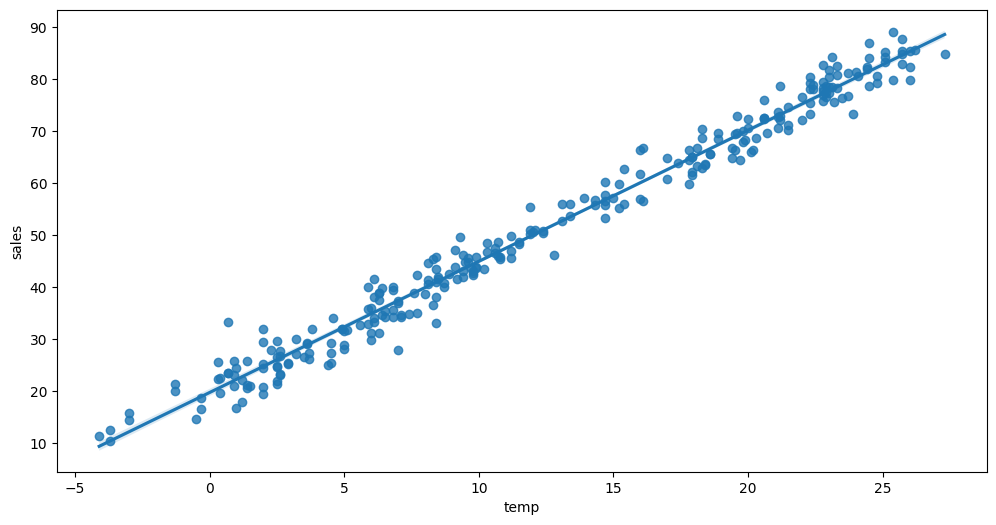

In [8]:
auto.target_analysis(
    train_data=df_train, 
    label='sales',
    fit_distributions=False
)

-   Type는 중요하지 않음

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_121551/"

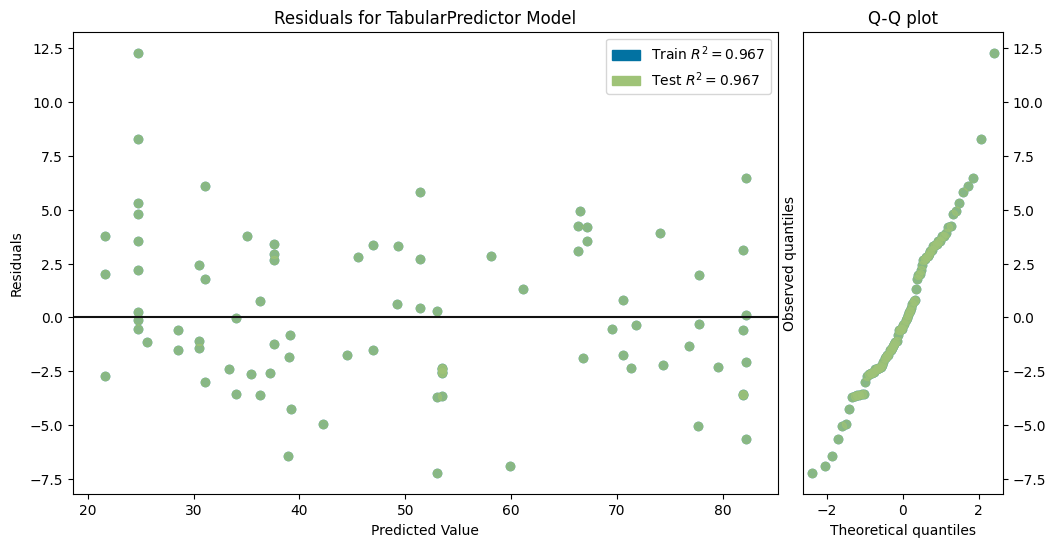

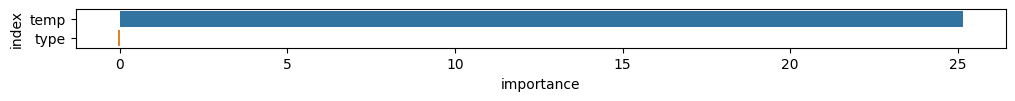

In [9]:
auto.quick_fit(
    train_data = df_train, 
    label='sales',
    show_feature_importance_barplots=True
)

-   type는 중오하지않음

## C. 관측치별 해석

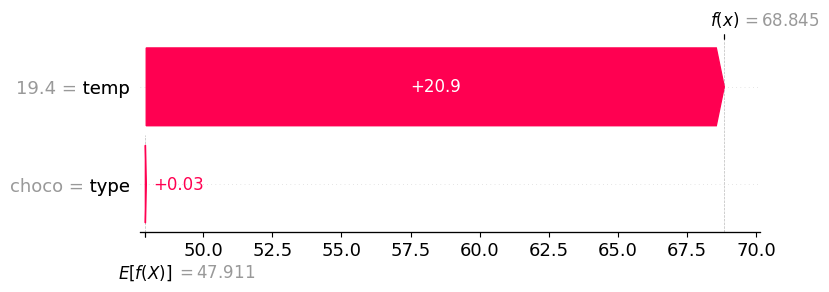

In [10]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]
)

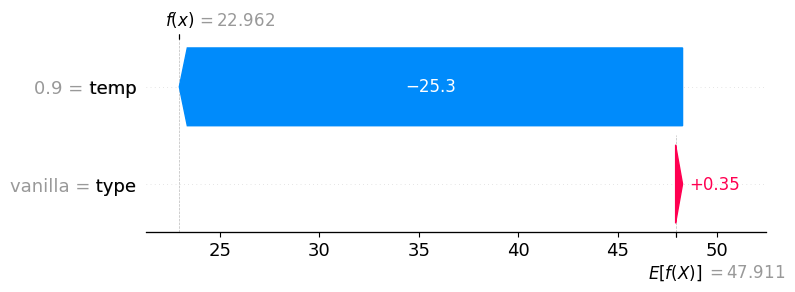

In [11]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]
)